In [1]:
from ultralytics import YOLO

try:
    model = YOLO('../models/m60.pt')
    print("Это YOLOv8 модель!")
    print("Классы:", model.names)
except Exception as e:
    print("Не YOLO:", e)


Это YOLOv8 модель!
Классы: {0: 'пора', 1: 'включение', 2: 'подрез', 3: 'прожог', 4: 'трещина', 5: 'наплыв', 6: 'эталон1', 7: 'эталон2', 8: 'эталон3', 9: 'пора-скрытая', 10: 'утяжина', 11: 'несплавление', 12: 'непровар корня'}


In [2]:
model.model

SegmentationModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )


In [3]:
model.names

{0: 'пора',
 1: 'включение',
 2: 'подрез',
 3: 'прожог',
 4: 'трещина',
 5: 'наплыв',
 6: 'эталон1',
 7: 'эталон2',
 8: 'эталон3',
 9: 'пора-скрытая',
 10: 'утяжина',
 11: 'несплавление',
 12: 'непровар корня'}

In [4]:
model.yaml

{'nc': 13,
 'scales': {'n': [0.5, 0.25, 1024],
  's': [0.5, 0.5, 1024],
  'm': [0.5, 1.0, 512],
  'l': [1.0, 1.0, 512],
  'x': [1.0, 1.5, 512]},
 'backbone': [[-1, 1, 'Conv', [64, 3, 2]],
  [-1, 1, 'Conv', [128, 3, 2]],
  [-1, 2, 'C3k2', [256, False, 0.25]],
  [-1, 1, 'Conv', [256, 3, 2]],
  [-1, 2, 'C3k2', [512, False, 0.25]],
  [-1, 1, 'Conv', [512, 3, 2]],
  [-1, 2, 'C3k2', [512, True]],
  [-1, 1, 'Conv', [1024, 3, 2]],
  [-1, 2, 'C3k2', [1024, True]],
  [-1, 1, 'SPPF', [1024, 5]],
  [-1, 2, 'C2PSA', [1024]]],
 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 6], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [512, False]],
  [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']],
  [[-1, 4], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [256, False]],
  [-1, 1, 'Conv', [256, 3, 2]],
  [[-1, 13], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [512, False]],
  [-1, 1, 'Conv', [512, 3, 2]],
  [[-1, 10], 1, 'Concat', [1]],
  [-1, 2, 'C3k2', [1024, True]],
  [[16, 19, 22], 1, 'Segment', ['nc', 32, 256]]],
 

In [7]:
import os
from collections import Counter

dataset_path = "../data/dataset_2"
splits = ["train", "val"]

for split in splits:
    img_folder = os.path.join(dataset_path, split, "images")
    label_folder = os.path.join(dataset_path, split, "labels")

    img_files = [f for f in os.listdir(img_folder) if f.lower().endswith((".jpg", ".png"))]
    label_files = [f for f in os.listdir(label_folder) if f.lower().endswith(".txt")]

    print(f"=== {split.upper()} ===")
    print(f"Images: {len(img_files)}")
    print(f"Labels: {len(label_files)}")
    
    #совпадение имён (без расширения)
    img_names = set(os.path.splitext(f)[0] for f in img_files)
    label_names = set(os.path.splitext(f)[0] for f in label_files)
    print(f"Images without label: {len(img_names - label_names)}")
    print(f"Labels without image: {len(label_names - img_names)}\n")

    class_counter = Counter()
    for lbl_file in label_files:
        with open(os.path.join(label_folder, lbl_file), 'r') as f:
            lines = f.readlines()
            for line in lines:
                cls_id = int(line.strip().split()[0])
                class_counter[cls_id] += 1

    print(f"Статистика по классам в {split}:")
    for cls_id, count in class_counter.items():
        cls_name = model.names.get(cls_id, f"Class_{cls_id}")
        print(f"  {cls_id} ({cls_name}): {count} объектов")
    print("\n")

=== TRAIN ===
Images: 16434
Labels: 16419
Images without label: 149
Labels without image: 134

Статистика по классам в train:
  0 (пора): 18506 объектов
  7 (эталон2): 1783 объектов
  6 (эталон1): 2074 объектов
  11 (несплавление): 113 объектов
  12 (непровар корня): 116 объектов
  1 (включение): 4420 объектов
  2 (подрез): 340 объектов
  8 (эталон3): 1 объектов
  10 (утяжина): 90 объектов
  3 (прожог): 1 объектов


=== VAL ===
Images: 5360
Labels: 5325
Images without label: 35
Labels without image: 0

Статистика по классам в val:
  0 (пора): 5923 объектов
  7 (эталон2): 574 объектов
  6 (эталон1): 687 объектов
  1 (включение): 1473 объектов
  4 (трещина): 1 объектов
  2 (подрез): 96 объектов
  11 (несплавление): 26 объектов
  12 (непровар корня): 30 объектов
  10 (утяжина): 22 объектов




Датасет почти совпадает, но есть небольшие расхождения: некоторые изображения без разметки и некоторые разметки без изображений

Вывод: Датасет несбалансирован. Основная проблема — несколько сильно доминирующих классов (пора) и редкие классы, что может повлиять на качество детекции редких дефектов.

In [9]:
from ultralytics import YOLO

# Загружаем модель
model = YOLO('../models/m60.pt')
print("Классы модели:", model.names)


Классы модели: {0: 'пора', 1: 'включение', 2: 'подрез', 3: 'прожог', 4: 'трещина', 5: 'наплыв', 6: 'эталон1', 7: 'эталон2', 8: 'эталон3', 9: 'пора-скрытая', 10: 'утяжина', 11: 'несплавление', 12: 'непровар корня'}


In [16]:
from ultralytics import YOLO

img_path = "../data/dataset_2/val/images/0-330-ls-14-d01_22800_23940.jpg"

# Запускаем инференс
results = model.predict(source=img_path)

# results — это список, берем первый элемент
r = results[0]

# Показ результатов
r.show()  # откроет изображение с разметкой

# Координаты, классы и confidence
print("Координаты объектов:", r.boxes.xyxy)
print("Классы объектов:", [model.names[int(c)] for c in r.boxes.cls])
print("Confidence:", r.boxes.conf)



image 1/1 c:\Users\\Desktop\ \Automatic-quality-control-of-welded-joints-by-X-ray-images\notebooks\..\data\dataset_2\val\images\0-330-ls-14-d01_22800_23940.jpg: 1152x1152 1 , 373.1ms
Speed: 8.7ms preprocess, 373.1ms inference, 10.2ms postprocess per image at shape (1, 3, 1152, 1152)
Координаты объектов: tensor([[295.3297, 546.1185, 305.0864, 554.6061]])
Классы объектов: ['пора']
Confidence: tensor([0.3256])


In [15]:
results = model.predict(source=img_path, conf=0.1, imgsz=1152)
r = results[0]
r.show()
print("Координаты объектов:", r.boxes.xyxy)
print("Классы объектов:", [model.names[int(c)] for c in r.boxes.cls])
print("Confidence:", r.boxes.conf)



image 1/1 c:\Users\\Desktop\ \Automatic-quality-control-of-welded-joints-by-X-ray-images\notebooks\..\data\dataset_2\val\images\_programdata_xvu_data_firesave_scan01_3420_4560.jpg: 1152x1152 (no detections), 418.8ms
Speed: 11.1ms preprocess, 418.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1152, 1152)
Координаты объектов: tensor([], size=(0, 4))
Классы объектов: []
Confidence: tensor([])


In [17]:
import os
import cv2
import torch
import numpy as np
from ultralytics import YOLO

def load_txt_polygons(label_path, img_shape):
    """
    label_path: путь к .txt с полигонами
    img_shape: (height, width) изображения
    возвращает список bounding box [x_min, y_min, x_max, y_max] в пикселях
    """
    h, w = img_shape[:2]
    bboxes = []
    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls = int(parts[0])
            coords = list(map(float, parts[1:]))
            xs = coords[::2] * w
            ys = coords[1::2] * h
            x_min, x_max = min(xs), max(xs)
            y_min, y_max = min(ys), max(ys)
            bboxes.append([x_min, y_min, x_max, y_max, cls])
    return bboxes

def visualize_comparison(img_path, model, label_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # предсказания модели
    results = model.predict(source=img_path)
    pred_boxes = []
    for r in results:
        for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
            pred_boxes.append([*box.tolist(), int(cls)])

    # аннотации
    gt_boxes = load_txt_polygons(label_path, (h, w))

    # визуализация
    vis = img.copy()
    for box in gt_boxes:
        x1, y1, x2, y2, cls = map(int, box)
        cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 2)  # зелёный = GT
    for box in pred_boxes:
        x1, y1, x2, y2, cls = map(int, box)
        cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 0, 255), 2)  # красный = предсказание

    cv2.imshow("Comparison", vis)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return pred_boxes, gt_boxes


In [18]:
def compute_iou(box1, box2):
    """
    box = [x_min, y_min, x_max, y_max]
    """
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    inter_area = max(0, x2 - x1) * max(0, y2 - y1)
    box1_area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2_area = (box2[2]-box2[0])*(box2[3]-box2[1])

    iou = inter_area / (box1_area + box2_area - inter_area + 1e-6)
    return iou


In [19]:
def evaluate_model_on_folder(img_folder, label_folder, model, iou_threshold=0.5):
    img_files = [f for f in os.listdir(img_folder) if f.lower().endswith((".jpg", ".png"))]
    total_objects = 0
    matched_objects = 0
    class_stats = {}

    for img_file in img_files:
        img_path = os.path.join(img_folder, img_file)
        label_path = os.path.join(label_folder, os.path.splitext(img_file)[0]+".txt")

        # Пропускаем изображения без разметки
        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        gt_boxes = load_txt_polygons(label_path, (h, w))
        results = model.predict(source=img_path)
        pred_boxes = []
        for r in results:
            for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
                pred_boxes.append([*box.tolist(), int(cls)])

        # подсчёт совпадений
        matched = set()
        for gt in gt_boxes:
            total_objects += 1
            for i, pred in enumerate(pred_boxes):
                if i in matched:
                    continue
                if gt[4] == pred[4] and compute_iou(gt[:4], pred[:4]) >= iou_threshold:
                    matched_objects += 1
                    matched.add(i)
                    break
            # статистика по классам
            class_stats[gt[4]] = class_stats.get(gt[4], 0) + 1

    accuracy = matched_objects / total_objects if total_objects else 0
    print(f"Total objects: {total_objects}, Matched: {matched_objects}, Accuracy: {accuracy:.3f}")
    print("Objects per class:", class_stats)
    return accuracy, class_stats



image 1/1 c:\Users\\Desktop\ \Automatic-quality-control-of-welded-joints-by-X-ray-images\notebooks\..\data\dataset_2\val\images\1-300-ls-14-g03_3420_4560.jpg: 1152x1152 1 2, 329.4ms
Speed: 8.1ms preprocess, 329.4ms inference, 6.8ms postprocess per image at shape (1, 3, 1152, 1152)


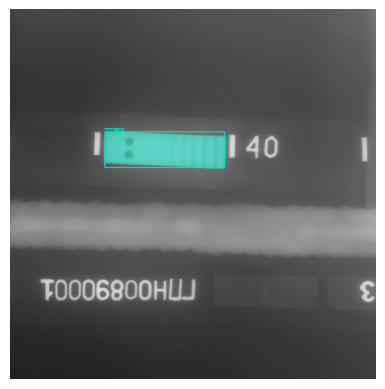

Координаты объектов (x_min, y_min, x_max, y_max):
tensor([[294.7466, 381.3959, 669.6348, 494.6992]])
Классы объектов:
['эталон2']
Confidence:
tensor([0.8826])

=== Содержимое .txt файла ===
7 0.258780 0.416207 0.261636 0.330755 0.587584 0.344844 0.583300 0.429826



In [29]:
import os
import matplotlib.pyplot as plt

# Путь к изображению и соответствующему .txt
# img_path = "../data/dataset_2/val/images/0-330-ls-14-d01_22800_23940.jpg"
# txt_path = "../data/dataset_2/val/labels/0-330-ls-14-d01_22800_23940.txt"

img_path = "../data/dataset_2/val/images/1-300-ls-14-g03_3420_4560.jpg"
txt_path = "../data/dataset_2/val/labels/1-300-ls-14-g03_3420_4560.txt"

# img_path = "../data/dataset_2/train/images/0-250-ls-r1-1-23nv_2280_3420.jpg"
# txt_path = "../data/dataset_2/train/labels/0-250-ls-r1-1-23nv_2280_3420.txt"

# Запуск предсказания
results = model.predict(source=img_path, show=False)
r = results[0]

# Показ изображения с разметкой
out_img = r.plot()  # возвращает изображение с нанесёнными bounding box
plt.imshow(out_img)
plt.axis('off')
plt.show()

# Координаты объектов
print("Координаты объектов (x_min, y_min, x_max, y_max):")
print(r.boxes.xyxy)

# Классы объектов
print("Классы объектов:")
print([model.names[int(c)] for c in r.boxes.cls])

# Confidence
print("Confidence:")
print(r.boxes.conf)

# Содержимое .txt для сверки
if os.path.exists(txt_path):
    print("\n=== Содержимое .txt файла ===")
    with open(txt_path, "r", encoding="utf-8") as f:
        print(f.read())
else:
    print("\n.txt файл не найден")
